In [1]:
import classes as cl
import network
import travel_time as travel
import partitioning as pa
import simulated_annealing as sa
import numpy as np

In [2]:
"Network Construction"

n = 15      # weight of the grid
m = 15      # height of the grid  
e = 5       # number of of existing PHCs
p = 10       # number of possible PHCs
p_min = 40  # min population of a block
p_max = 80  # max population of a block
d_b = 5     # distance from a block to a block or stop
d_s = 3     # distance between consecutive stops

grid, V_stops, V_blocks, V_existing, V_possible, pop = network.create_grid(n, m, e, p, p_min, p_max, d_b, d_s)

# Check if all the functions work properly in network.

# node = grid[(1,2)]
# node.get_node_ID()

grid_list = list(grid.values())
stops_list = list(V_stops.values())
blocks_list = list(V_blocks.values())
possible_list = list(V_possible.values())
existing_list = list(V_existing.values())

In [3]:
"Multi-way Set Partitioning"

time = 10  # Stops searching after 10 seconds and provides the best solution of that moment.

objective_value, set_weights, partitioning = pa.multiway_number_partitioning(V_blocks, V_existing, time)

print(objective_value)
print(set_weights)



# 1) add time 90 as a variable to simulated annealing. When we call simulated annealing, it should be correlated.
# 2) Should we get lists instead of dictionaries? We will not need to convert them to a list in partitioning, simulated an.
#    simulated annealing is turned to lists. Make changes everywhere. all_facilities in SA can be also defined in the main.
# 3) We should increase p to 10.

22.0
[2316, 2332, 2327, 2336, 2338]


In [4]:
np.sum(pop)

11649

In [5]:
all_facilities = {**V_existing, **V_possible}
all_facilities.keys()

dict_keys([(0, 4), (1, 4), (12, 1), (12, 14), (14, 9), (3, 4), (4, 9), (5, 9), (5, 12), (6, 1), (6, 13), (9, 14), (11, 1), (11, 8), (12, 0)])

In [6]:
"Initial Solution"

locator, assigner = sa.generate_initial_solution(V_blocks, V_existing, V_possible, partitioning)

In [7]:
all_facilities = {**V_existing, **V_possible}
count = 0
for i in V_blocks.keys():
    for j in all_facilities.keys():
        if assigner[(i, j)] == 1:
            count = count + 1

In [8]:
"Neighbor Generation"

total_pop = np.sum(pop)
max = 7
epsilon = 0.1

neighbor_locator, neighbor_assigner, assigned_pop = sa.make_neighbor_solution(V_blocks, V_existing, V_possible, max, epsilon, total_pop)

assigned_pop

{(0, 4): 1822,
 (1, 4): 1782,
 (12, 1): 1814,
 (12, 14): 1745,
 (14, 9): 1261,
 (3, 4): 0,
 (4, 9): 0,
 (5, 9): 0,
 (5, 12): 1812,
 (6, 1): 0,
 (6, 13): 0,
 (9, 14): 0,
 (11, 1): 1413,
 (11, 8): 0,
 (12, 0): 0}

In [9]:
node = grid[(3,2)]
node.get_node_neighbors()

{(2, 1), (2, 2), (3, 1), (3, 3), (4, 2), (4, 3)}

In [10]:
node.get_node_distance()

{(2, 1): 3, (4, 3): 3, (3, 1): 5, (4, 2): 5, (3, 3): 5, (2, 2): 5}

In [11]:
"Travel Time"

sources = {**V_existing, **V_possible}

for source in sources.keys():
    travel_to_source = travel.travel_time_to_source(grid, source)
    #print(source)
    #max_key = max(travel_to_source, key = travel_to_source.get)
    #print(max_key, travel_to_source[max_key])
    #print(travel_to_source)

travel2 = travel.travel_time(grid, V_existing, V_possible)


In [12]:
obj_value = sa.objective_function(V_blocks, V_existing, V_possible, travel2, neighbor_assigner)

In [13]:
print(obj_value)

1553805.35


In [ ]:
"Simulated Annealing"

max_iterations = 2000  
initial_temperature = 1.0  
cooling_rate = 0.0001
epsilon = 0.2


final_assigner, final_locator, final_energy, locators = sa.simulated_annealing(V_blocks, V_existing, V_possible, partitioning, 
                                            travel2, max_iterations, initial_temperature, cooling_rate, max, epsilon, total_pop)


print("Optimized Solution:", final_locator)
print("Objective Function Value (Max Access):", final_energy)



In [15]:
open_facilities = []
for j in all_facilities.keys():
    if final_locator[j] == 1:
            open_facilities.append(j)
lower_bound = (1 - epsilon)* total_pop / len(open_facilities)
upper_bound = (1 + epsilon)* total_pop / len(open_facilities)
print(lower_bound)
print(upper_bound)

1164.9
1747.35


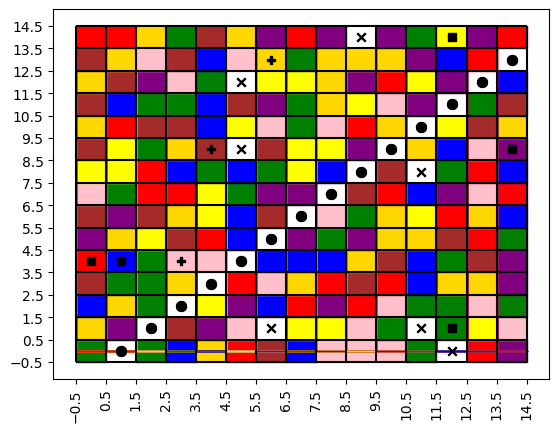

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap


## Open Possible Facilities (dot ,each has different color)
## Existing Facilities (mark, each has different color)
## Closed Facilities  (Dot, no color)
## Stops   (Cross, no color)
# Blocks  (No dot, facility color)

    
open_facilities = []
closed_facilities = []

for j in V_possible.keys():
    if final_locator[j] == 1:
        open_facilities.append(j)
    else:
        closed_facilities.append(j)    


grid_size = 1
x1 = np.arange(-0.5, 15.5, grid_size)
y1 = np.arange(-0.5, 15.5, grid_size)


# Define your 15 colors
open_colors = ['pink', 'brown', 'gold', 'indigo', 'cyan', 'orange', 'gray', 'olive', 'lime', 'teal', 'magenta']
existing_colors = ['red', 'blue', 'green', 'yellow', 'purple']

center_color = {}

for stop in V_stops.keys():
    x = stop[0]
    y = stop[1]
    plt.scatter(x, y, c='black',s=50, facecolors=None)    # stops are marked using cross.(no ceil color) 

for close in closed_facilities:
    x = close[0]
    y = close[1] 
    plt.scatter(x, y, c='black', marker="x", facecolors=None)   # Closed Facilities: marker = x  (no ceil color)

for k, exist in enumerate(V_existing.keys()):   # Existing Facilities: marker = square.  (each ceil has different color)
    x = exist[0]
    y = exist[1]
    center_color[exist] = existing_colors[k]
    plt.scatter(x, y, c='black', marker="s", facecolors='none')  

for k, open in enumerate(open_facilities):   # Open Possible Facilities: marker = +. (each ceil has different color)
    x = open[0]
    y = open[1]
    center_color[open] = open_colors[k]
    plt.scatter(x, y, c='black', marker="P", facecolors='none')  

for block in V_blocks.keys():
    for facility in all_facilities:
        if final_assigner[block, facility] == 1:  # We are assuming every block is assigned to one facility.
                center_color[block] = center_color[facility]

# Draw vertical lines
for i in range(len(x1)):
    plt.vlines(x1[i], ymin=y1[0], ymax=y1[-1], color='black')

# Draw horizontal lines
for j in range(len(y1)):
    plt.hlines(y1[j], xmin=x1[0], xmax=x1[-1], color='black')

for key in center_color.keys():
    x = key[0]
    y = key[1]
    x_coords = [x - 0.5, x + 0.5, x + 0.5, x - 0.5]
    y_coords = [y - 0.5, y - 0.5, y + 0.5, y + 0.5]

    plt.fill_between(x_coords, y_coords, color=center_color[key])

for stop in V_stops.keys():
    x = stop[0]
    y = stop[1]
    plt.scatter(x, y, c='black',s=50, facecolors=None)    # stops are marked using cross.(no ceil color) 

for close in closed_facilities:
    x = close[0]
    y = close[1]
    plt.scatter(x, y, c='black', marker="x", facecolors=None)   # Closed Facilities: marker = x  (no ceil color)

for k, exist in enumerate(V_existing.keys()):   # Existing Facilities: marker = square.  (each ceil has different color)
    x = exist[0]
    y = exist[1]
    center_color[exist] = existing_colors[k]
    plt.scatter(x, y, c='black', marker="s", facecolors='none')  

for k, open in enumerate(open_facilities):   # Open Possible Facilities: marker = +. (each ceil has different color)
    x = open[0]
    y = open[1]
    center_color[open] = open_colors[k]
    plt.scatter(x, y, c='black', marker="P", facecolor='none')  

plt.yticks(y1)
plt.xticks(x1, rotation=90)
plt.show()


In [17]:
counter = {}

for facility in all_facilities.keys():
    counter[facility] = 0
    for node in V_blocks.keys():
        if final_assigner[node, facility] == 1:
            counter[facility] = counter[facility]+1
counter


{(0, 4): 24,
 (1, 4): 24,
 (12, 1): 30,
 (12, 14): 20,
 (14, 9): 25,
 (3, 4): 20,
 (4, 9): 25,
 (5, 9): 0,
 (5, 12): 0,
 (6, 1): 0,
 (6, 13): 28,
 (9, 14): 0,
 (11, 1): 0,
 (11, 8): 0,
 (12, 0): 0}

In [18]:
print(V_blocks.keys() & V_possible.keys()) #

set()
